In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
rides = pd.read_pickle('/home/michael/Documents/Projects/divvydataproject/data/dateagg.pkl')
rides = rides.reset_index(inplace = False)
rides.columns = ['ds','y']
rides = rides.sort_values('ds')
rides.tail()

,ds,y
1630,2017-12-27,1138
1631,2017-12-28,1294
1632,2017-12-29,1076
1633,2017-12-30,548
1634,2017-12-31,651


In [93]:
rides.y.sum()

13822258

In [96]:
rides.sort_values('y',ascending = False).head(10)

,ds,y
1158,2016-07-16,24989
735,2015-07-04,24801
1542,2017-07-08,22106
1549,2017-07-15,21945
677,2015-06-27,21703
734,2015-07-03,21289
1187,2016-07-09,21154
743,2015-07-12,20987
1521,2017-07-29,20798
1496,2017-08-19,20797


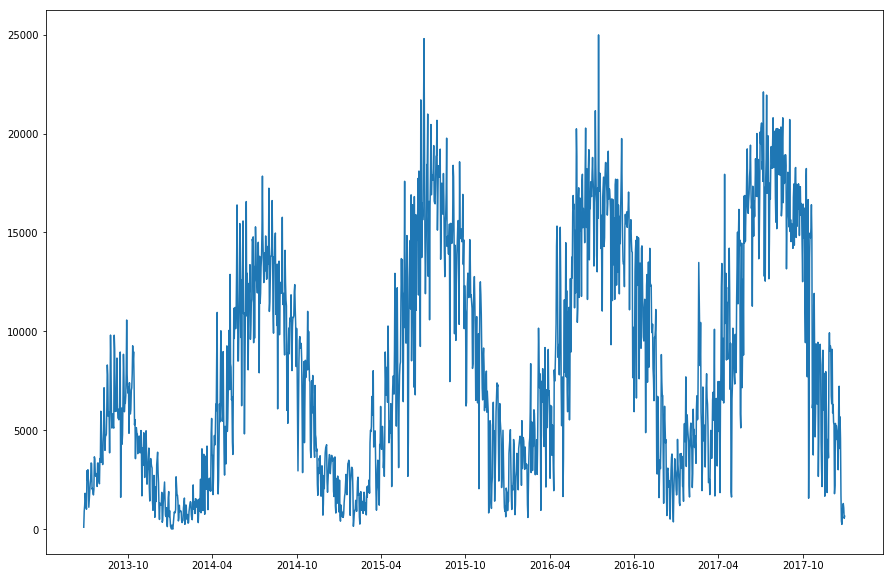

In [69]:
plt.figure(figsize = (15,10))
plt.plot(rides['ds'] , rides['y']);

## Facebook Prophet

In [126]:
m = Prophet()
m.fit(rides);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/michael/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [127]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2007,2018-12-27
2008,2018-12-28
2009,2018-12-29
2010,2018-12-30
2011,2018-12-31


In [128]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2007,2018-12-27,4237.213519,571.415288,8058.012398
2008,2018-12-28,4467.763210,1044.924323,7967.993584
2009,2018-12-29,4342.767190,666.781104,7832.095040
2010,2018-12-30,3695.500654,-85.863377,7371.897687
2011,2018-12-31,4337.153801,923.271988,8022.419486


In [129]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
2007,2018-12-27,11136.599339,9186.215901,13135.097384,571.415288,8058.012398,-6899.385820,-6899.385820,-6899.385820,-6899.385820,-6899.385820,-6899.385820,-111.138852,-111.138852,-111.138852,-6788.246967,-6788.246967,-6788.246967,4237.213519
2008,2018-12-28,11137.913358,9180.136101,13142.721532,1044.924323,7967.993584,-6670.150147,-6670.150147,-6670.150147,-6670.150147,-6670.150147,-6670.150147,197.013010,197.013010,197.013010,-6867.163158,-6867.163158,-6867.163158,4467.763210
2009,2018-12-29,11139.227377,9174.056302,13151.779162,666.781104,7832.095040,-6796.460187,-6796.460187,-6796.460187,-6796.460187,-6796.460187,-6796.460187,138.082749,138.082749,138.082749,-6934.542936,-6934.542936,-6934.542936,4342.767190
2010,2018-12-30,11140.541396,9167.976502,13160.807137,-85.863377,7371.897687,-7445.040741,-7445.040741,-7445.040741,-7445.040741,-7445.040741,-7445.040741,-455.599964,-455.599964,-455.599964,-6989.440777,-6989.440777,-6989.440777,3695.500654
2011,2018-12-31,11141.855415,9161.896702,13169.546184,923.271988,8022.419486,-6804.701613,-6804.701613,-6804.701613,-6804.701613,-6804.701613,-6804.701613,226.399814,226.399814,226.399814,-7031.101427,-7031.101427,-7031.101427,4337.153801


In [130]:
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')

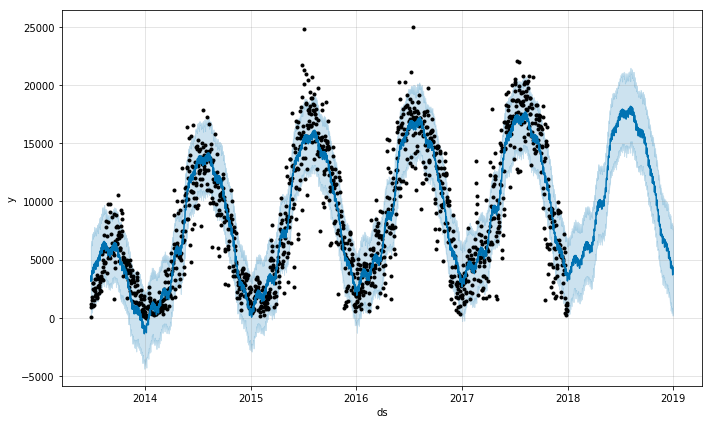

In [73]:
m.plot(forecast);

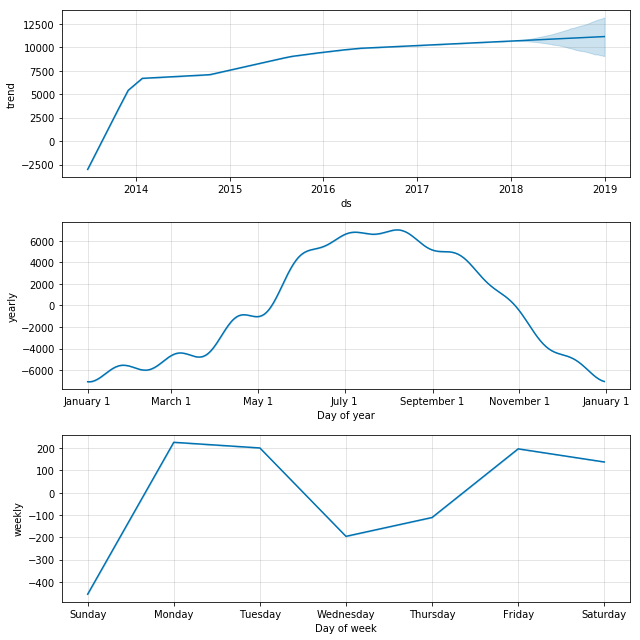

In [77]:
m.plot_components(forecast);

## Holidays

In [117]:
fourth = pd.DataFrame({
  'holiday': 'Fourth',
  'ds': pd.to_datetime(['2013-07-04', '2014-07-04', '2015-07-04',
                        '2016-07-04', '2017-07-04','2018-07-04']),
  'lower_window': -1,
  'upper_window': 1,
})

pitchfork = pd.DataFrame({
  'holiday': 'Fourth',
  'ds': pd.to_datetime(['2013-07-20', '2014-07-19', '2015-07-18',
                        '2016-07-16', '2017-07-15','2018-07-21']),
  'lower_window': -1,
  'upper_window': 1,
})

holidays  = pd.concat((fourth,pitchfork))

In [118]:
m2 = Prophet(holidays = holidays)
m2.fit(rides)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/michael/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


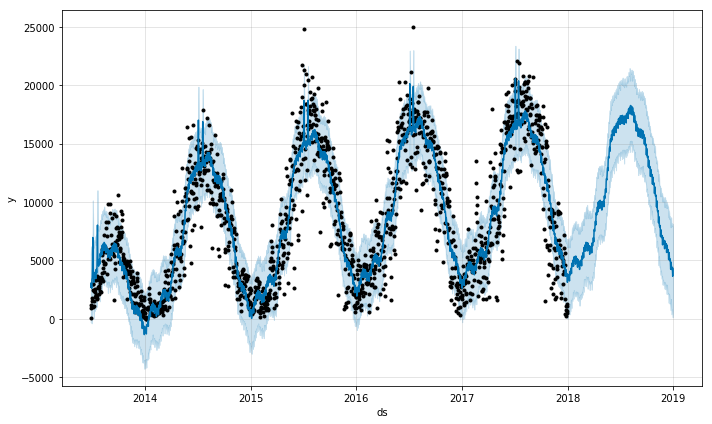

In [119]:
m2.plot(forecast2);

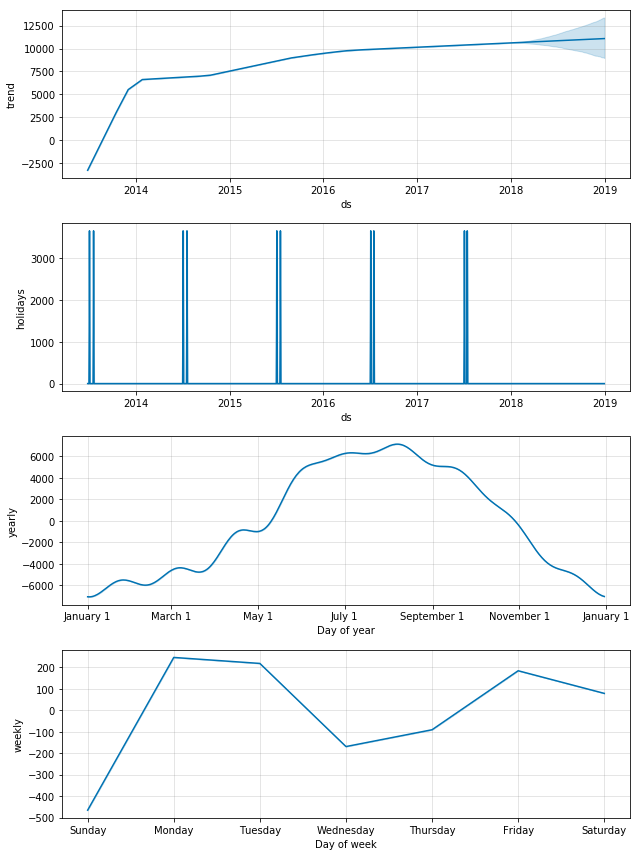

In [120]:
m2.plot_components(forecast2);

## Hourly Rides

In [27]:
hourlyrides = pd.read_pickle('/home/michael/Documents/Projects/divvydataproject/data/houraggsmall.pkl')
hourlyrides = hourlyrides.groupby('starthour',as_index = False)[['trip_id']].sum()
hourlyrides.columns = ['ds','y']
hourlyrides = hourlyrides[hourlyrides['ds'].dt.year > 2013]

In [34]:
hourlyrides.head()

,ds,y
4450,2014-01-01 00:00:00,3
4451,2014-01-01 01:00:00,2
4452,2014-01-01 02:00:00,13
4453,2014-01-01 03:00:00,10
4454,2014-01-01 04:00:00,4


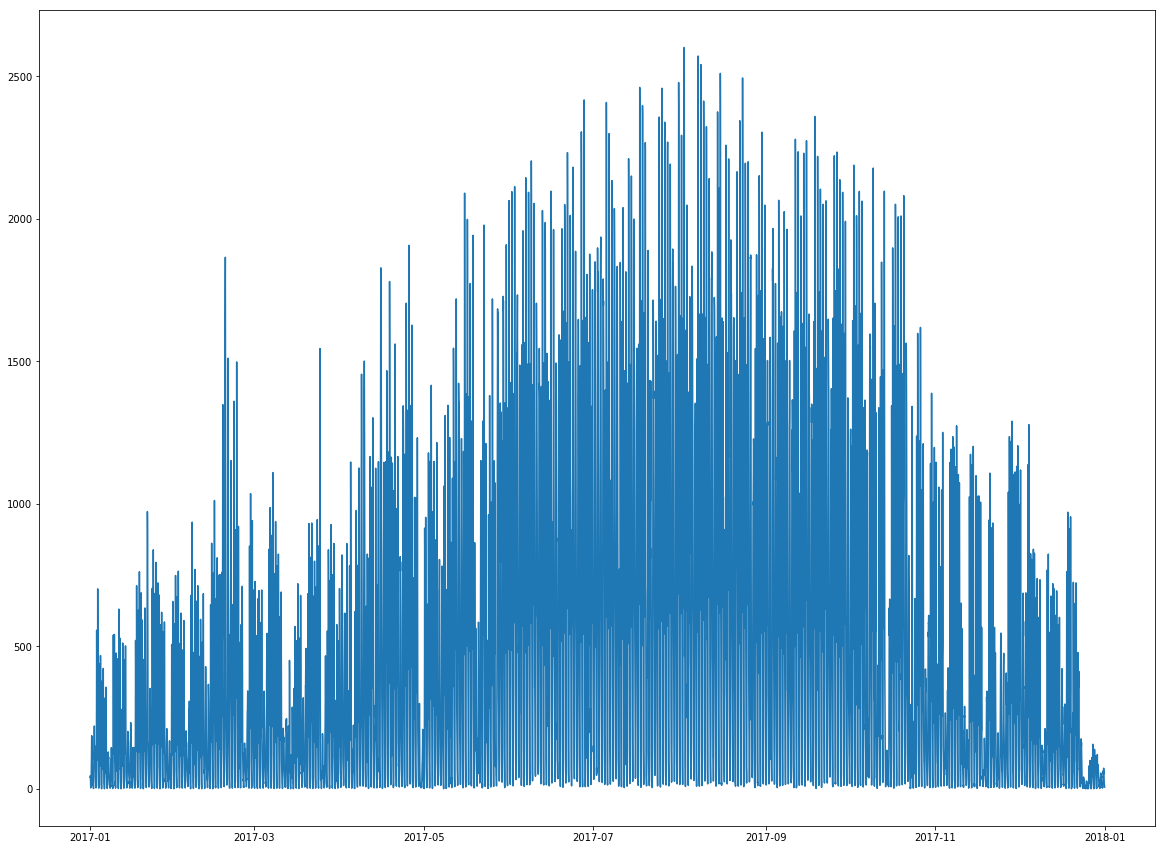

In [35]:
hourlyrides17 = hourlyrides[hourlyrides['ds'].dt.year > 2016]
plt.figure(figsize = (20,15))
plt.plot(hourlyrides17['ds'] , hourlyrides17['y']);

In [29]:
m3 = Prophet()
m3.fit(hourlyrides)
future3 = m3.make_future_dataframe(periods=365)
forecast3 = m3.predict(future3)

/home/michael/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


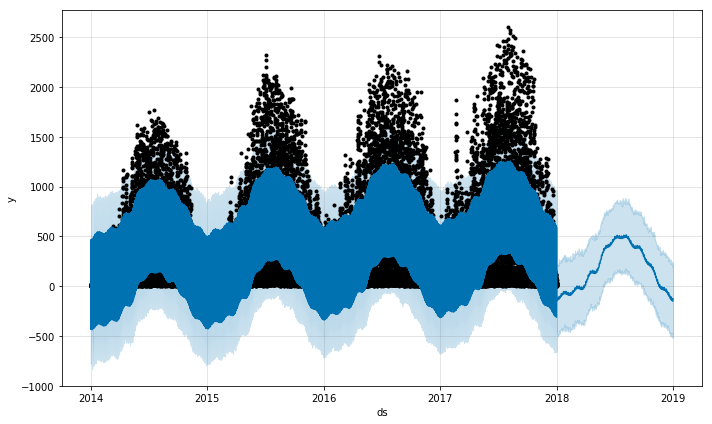

In [30]:
m3.plot(forecast3);

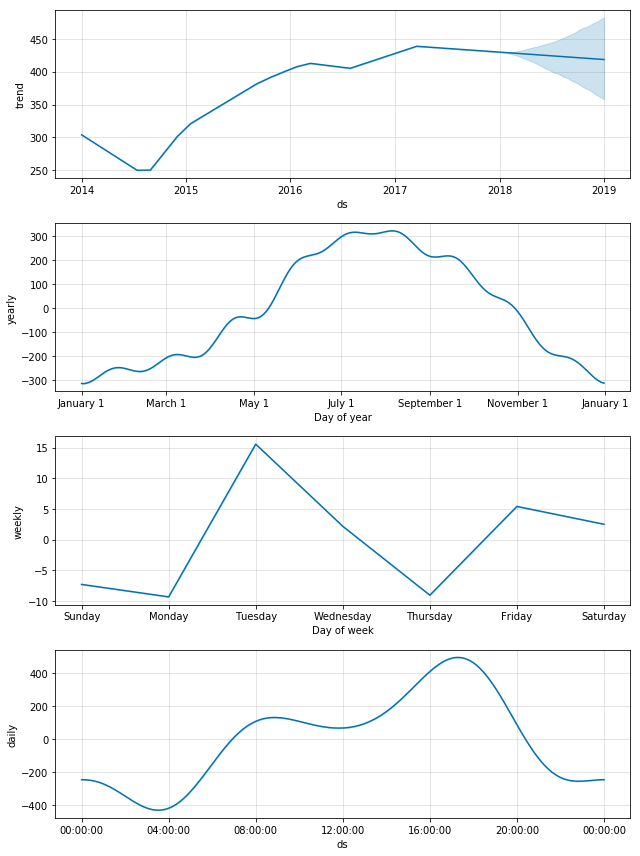

In [31]:
m3.plot_components(forecast3);

In [33]:
forecast3.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2014-01-01 00:00:00,304.049062,304.049062,304.049062,-611.827905,93.830290,-246.397127,-246.397127,-246.397127,-557.571924,...,-557.571924,-557.571924,-557.571924,2.177286,2.177286,2.177286,-313.352084,-313.352084,-313.352084,-253.522861
1,2014-01-01 01:00:00,304.037549,304.037549,304.037549,-650.379924,86.681074,-271.912685,-271.912685,-271.912685,-584.339472,...,-584.339472,-584.339472,-584.339472,0.960101,0.960101,0.960101,-313.386889,-313.386889,-313.386889,-280.301923
2,2014-01-01 02:00:00,304.026035,304.026035,304.026035,-699.281073,-6.785509,-345.886640,-345.886640,-345.886640,-659.543179,...,-659.543179,-659.543179,-659.543179,-0.235962,-0.235962,-0.235962,-313.420577,-313.420577,-313.420577,-355.517144
3,2014-01-01 03:00:00,304.014522,304.014522,304.014522,-775.134307,-58.719138,-418.252893,-418.252893,-418.252893,-733.107712,...,-733.107712,-733.107712,-733.107712,-1.401673,-1.401673,-1.401673,-313.453146,-313.453146,-313.453146,-429.093190
4,2014-01-01 04:00:00,304.003008,304.003008,304.003008,-770.914348,-106.082720,-419.204964,-419.204964,-419.204964,-735.217748,...,-735.217748,-735.217748,-735.217748,-2.528186,-2.528186,-2.528186,-313.484598,-313.484598,-313.484598,-431.214739


## Sample Single Location

In [7]:
cubs = pd.read_pickle('/home/michael/Documents/Projects/divvydataproject/data/pitchfulldataagg.pkl')
cubs.head()
cubshourly = cubs[['datetime','net']]
cubshourly.columns = ['ds','y']
cubshourly = cubshourly[cubshourly['ds'].dt.year > 2013]
cubshourly.head()

,ds,y
2507,2014-01-10 12:00:00,1.0
2508,2014-01-10 00:00:00,0.0
2509,2014-01-10 01:00:00,0.0
2510,2014-01-10 02:00:00,0.0
2511,2014-01-10 03:00:00,0.0


In [19]:
pitchforkdates = pd.read_csv('/home/michael/Documents/Projects/divvydataproject/data/EventsManualList.csv')
pitchforkdates = pitchforkdates[pitchforkdates['Event'] == 'pitchfork']
dates = [x for x in pitchforkdates['Date']]
holiday = pd.DataFrame({
  'holiday': 'pitchfork',
  'ds': pd.to_datetime(dates)
})

In [20]:
m4 = Prophet(holidays = holiday)
m4.fit(cubshourly)
future4 = m4.make_future_dataframe(freq='H', periods=8760)
forecast4 = m4.predict(future4)

/home/michael/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [24]:
forecast4.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,holidays,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2014-01-01 00:00:00,0.281021,0.281021,0.281021,-1.355469,1.067136,-0.198559,-0.198559,-0.198559,0.0,...,-0.429211,-0.429211,-0.429211,0.046865,0.046865,0.046865,-0.277517,-0.277517,-0.277517,-0.148190
1,2014-01-01 01:00:00,0.280981,0.280981,0.280981,-1.270442,1.053950,-0.194616,-0.194616,-0.194616,0.0,...,-0.427055,-0.427055,-0.427055,0.045231,0.045231,0.045231,-0.277671,-0.277671,-0.277671,-0.146074
2,2014-01-01 02:00:00,0.280940,0.280940,0.280940,-1.462583,1.036357,-0.272139,-0.272139,-0.272139,0.0,...,-0.506250,-0.506250,-0.506250,0.043712,0.043712,0.043712,-0.277823,-0.277823,-0.277823,-0.225310
3,2014-01-01 03:00:00,0.280900,0.280900,0.280900,-1.530485,1.004166,-0.363009,-0.363009,-0.363009,0.0,...,-0.598669,-0.598669,-0.598669,0.042313,0.042313,0.042313,-0.277974,-0.277974,-0.277974,-0.317769
4,2014-01-01 04:00:00,0.280860,0.280860,0.280860,-1.630775,0.878240,-0.378238,-0.378238,-0.378238,0.0,...,-0.615319,-0.615319,-0.615319,0.041041,0.041041,0.041041,-0.278123,-0.278123,-0.278123,-0.334460


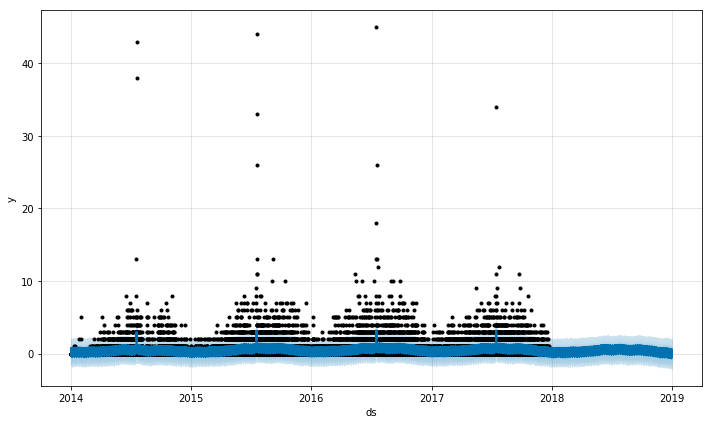

In [21]:
m4.plot(forecast4);

In [25]:
forecast4.to_pickle('/home/michael/Documents/Projects/divvydataproject/data/prophetupdated.pkl')

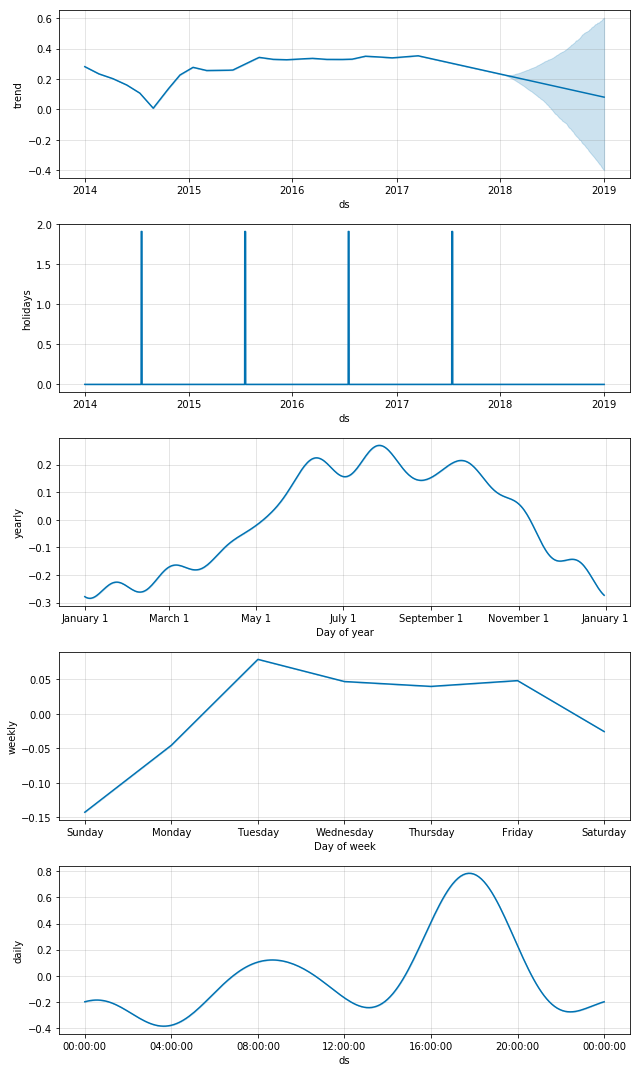

In [22]:
m4.plot_components(forecast4);

In [23]:
cubs['date'] = cubs['starthour'].dt.date
cubsdailymax = cubs.groupby('date', as_index = False)[['trip_id']].max()
cubsdailymax.columns = ['ds','y']
cubsdailymax.head()
#cubs.head()

KeyError: 'starthour'

In [45]:
m5 = Prophet()
m5.fit(cubsdailymax)
future5 = m5.make_future_dataframe(periods=365)
forecast5 = m5.predict(future5)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/michael/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


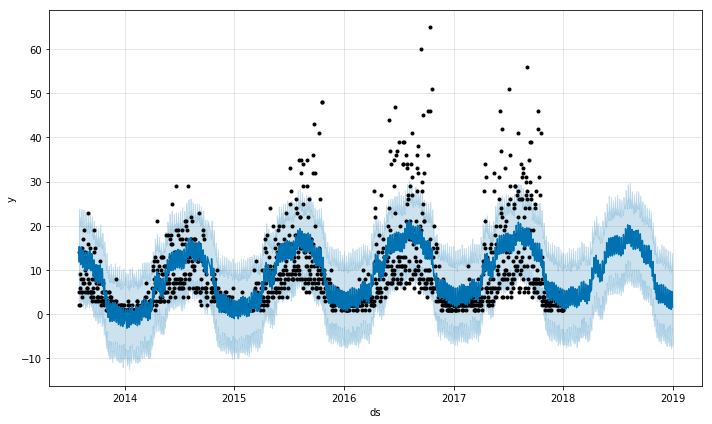

In [49]:
m5.plot(forecast5);

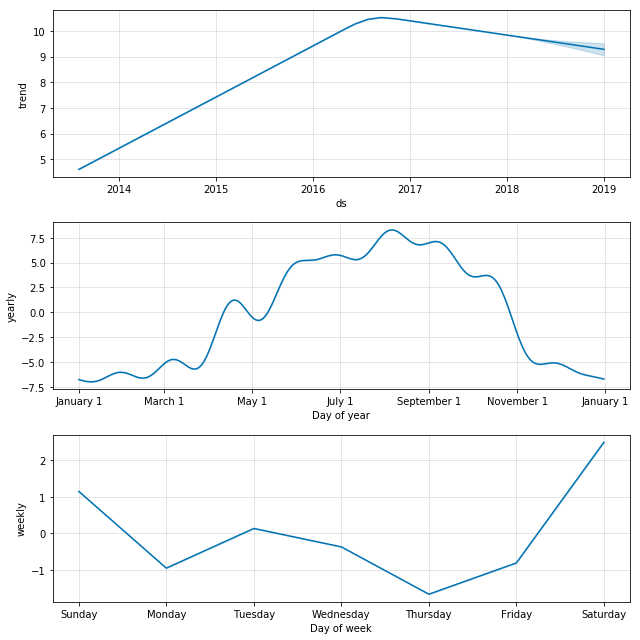

In [50]:
m5.plot_components(forecast5);